In [1]:
# Lasciate questa cella così ogni volta che aggiornate un file python, 
# anche gli import nel notebook vengono aggiornati

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

from Utils import *
from constants import *

from Environment import *
from Non_Stationary_Environment import *

from Social_influence import *
from Network import Network

from Simulation import *

from Ecommerce import *
from Ecommerce3 import *
from Ecommerce4 import *
from Ecommerce5 import *
from Ecommerce6 import *
from step7.Ecommerce7 import*

## Plot learned functions in GP

In [ ]:
graph_weights, alpha_bars, product_prices, users_reservation_prices, \
    observations_probabilities, users_poisson_parameters = setup_environment()

env = Environment(users_reservation_prices, graph_weights, alpha_bars)

ecomm = Ecommerce(B_cap, budgets, product_prices)
ecomm3_gpts = Ecommerce3_GPTS(B_cap, budgets, product_prices)
ecomm3_gpucb = Ecommerce3_GPUCB(B_cap, budgets, product_prices)

for t in tqdm(range(0, T), position = 0, desc="n_iteration"):
    # Every day a new montecarlo simulation must be run to sample num of items sold
    num_sold_items = estimate_nodes_activation_probabilities(
        env.network.get_adjacency_matrix(),
        env.users_reservation_prices,
        users_poisson_parameters,
        product_prices,
        observations_probabilities
    )

    expected_reward = env.compute_clairvoyant_reward(
        num_sold_items,
        product_prices,
        budgets
    )     

    # aggregation is needed since in this step the ecommerce
    # cannot observe the users classes features
    aggregated_num_sold_items = np.sum(num_sold_items, axis = 0)

    arm, arm_idxs = ecomm3_gpts.pull_arm(aggregated_num_sold_items)
    # the environment returns the users_alpha and the reward for that allocation
    alpha, _ = env.round_step3(pulled_arm = arm, pulled_arm_idxs = arm_idxs)
    ecomm3_gpts.update(arm_idxs, alpha)

    arm, arm_idxs = ecomm3_gpucb.pull_arm(aggregated_num_sold_items)
    alpha, _ = env.round_step3(pulled_arm = arm, pulled_arm_idxs = arm_idxs)
    ecomm3_gpucb.update(arm_idxs, alpha)

plot_learned_functions(ecomm3_gpts, ecomm3_gpucb, env)

## Step 3

Experiment n°: 1


n_iteration: 100%|██████████| 70/70 [11:37<00:00,  9.97s/it]


Experiment n°: 2


n_iteration: 100%|██████████| 70/70 [07:36<00:00,  6.52s/it]


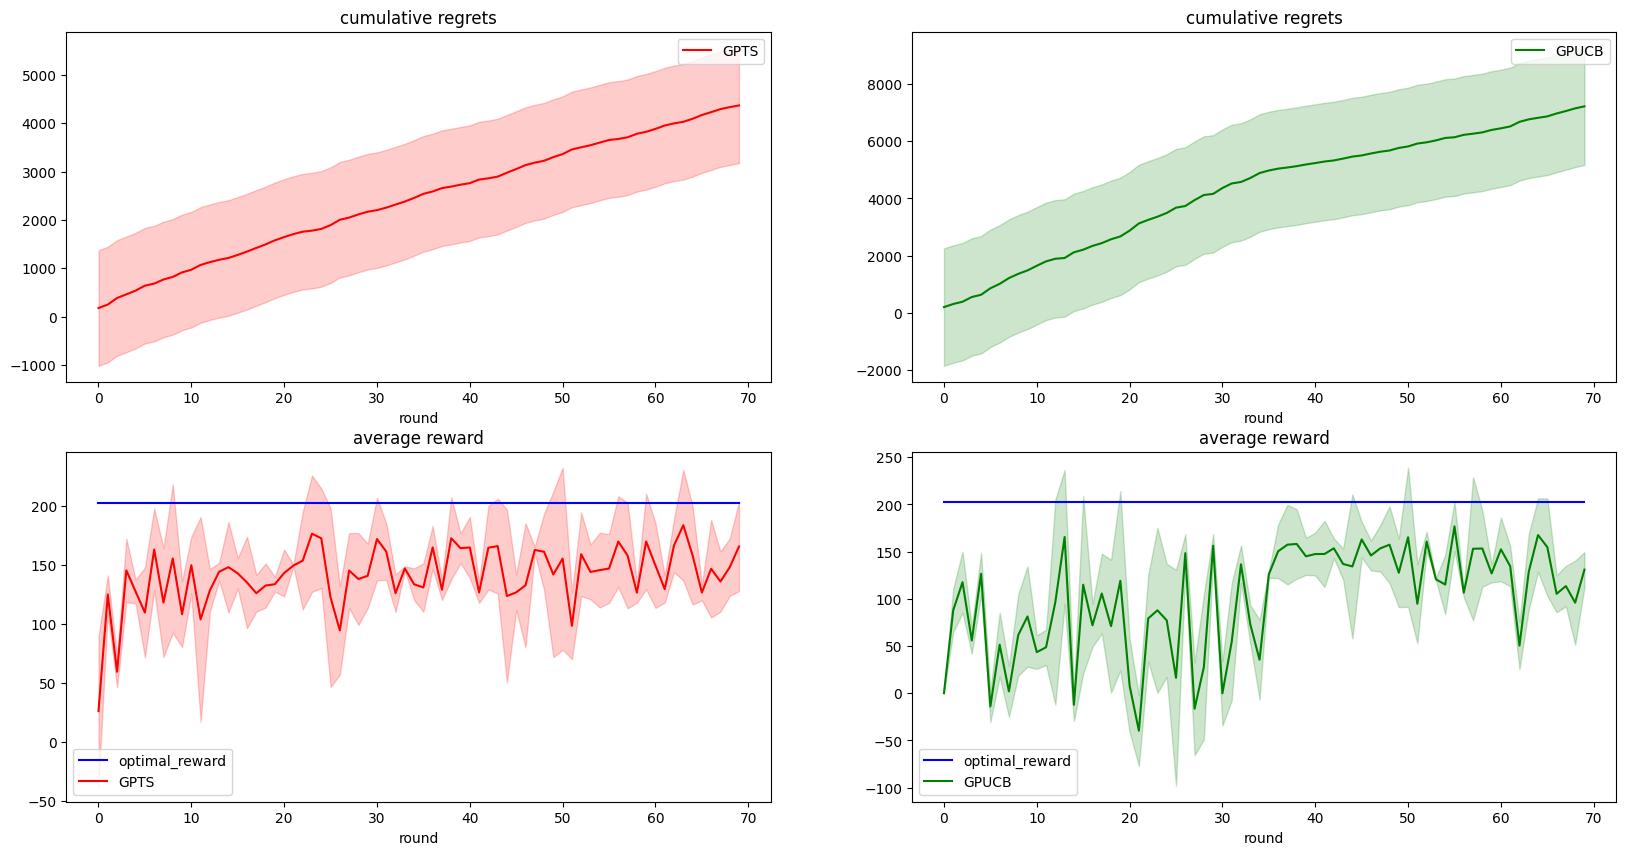

In [5]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step3()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

## Step 4

In [ ]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step4()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

## Step 5

In [ ]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step5()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])

## Step 6

In [ ]:
swucb_rewards_per_experiment, cducb_rewards_per_experiment, opts = simulate_step6()
plot_regrets(swucb_rewards_per_experiment, cducb_rewards_per_experiment, opts, ["SWUCB", "CDUCB"])

## Step 7

In [ ]:
gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts = simulate_step7()
plot_regrets(gpts_rewards_per_experiment, gpucb_rewards_per_experiment, opts, ["GPTS", "GPUCB"])